### Shoe brand classification and prediction

The dataset is women's shoe price from Kaggle competitions. Dataset contains 33801 observations and 52 columns.Data include brand,price,merchants variables and other attributes of product. Using these features, the task is to predict the brand name. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# loading women's shoes pices data as data
data= pd.read_csv('C:\data_science\data_sets\womens-shoes-prices.zip',compression='zip',low_memory=False)

In [3]:
data.head().T

,0,1,2,3,4
id,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H
asins,NaN,NaN,NaN,NaN,NaN
brand,Novica,Novica,Novica,Novica,Novica
categories,"Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing"
colors,Purple,Purple,Purple,Purple,Purple
count,NaN,NaN,NaN,NaN,NaN
dateAdded,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z
dateUpdated,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z
descriptions,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017..."
dimension,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,33801,9996,AVpfiLB71cnluZ0-mdRy,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,2422,1245,"B002MUU6JG,B017MXDUZY,B002MUSAQW,B002MUSAQC,B0...",57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,32817,1360,Journee Collection,1401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,33801,894,"Clothing,Shoes,Women's Shoes,All Women's Shoes",3156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
colors,19844,2065,Black,2928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateAdded,33801,7006,2017-03-28T11:43:08Z,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateUpdated,33801,6506,2017-03-28T11:42:28Z,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
descriptions,28425,7186,"[{""dateSeen"":[""2017-03-25T09:34:20.165Z""],""sou...",67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimension,1177,100,6.0 in x 6.0 in x 1.0 in,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

In [6]:
data.shape

(33801, 52)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
id                     33801 non-null object
asins                  2422 non-null object
brand                  32817 non-null object
categories             33801 non-null object
colors                 19844 non-null object
count                  0 non-null float64
dateAdded              33801 non-null object
dateUpdated            33801 non-null object
descriptions           28425 non-null object
dimension              1177 non-null object
ean                    9778 non-null float64
features               27181 non-null object
flavors                0 non-null float64
imageURLs              22309 non-null object
isbn                   0 non-null float64
keys                   33801 non-null object
manufacturer           9279 non-null object
manufacturerNumber     31434 non-null object
merchants              15382 non-null object
name                   33801 non-null object
pri

# Data Cleaning

In [8]:
# Changing headers to lowercase
data.columns= map(str.lower, data.columns)

In [9]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices.amountmin',
       'prices.amountmax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateadded', 'prices.dateseen', 'prices.flavor', 'prices.issale',
       'prices.merchant', 'prices.offer', 'prices.returnpolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceurls',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'unnamed: 48',
       'unnamed: 49', 'unnamed: 50', 'unnamed: 51'],
      dtype='object')

## Removing columns with null values

In [10]:
data_null_table_df = pd.DataFrame(data.isnull().sum(axis=0),columns=['num_nulls'])

In [11]:
data_null_table_df['feature_name'] = data_null_table_df.index
data_null_table_df['ratio_of_null'] = data_null_table_df['num_nulls']/data.shape[0]

In [12]:
data_null_table_df.head(5)

,num_nulls,feature_name,ratio_of_null
id,0,id,0.000000
asins,31379,asins,0.928345
brand,984,brand,0.029112
categories,0,categories,0.000000
colors,13957,colors,0.412917


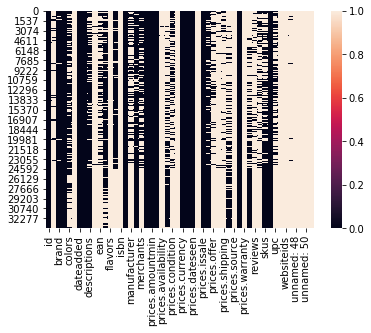

In [13]:
sns.heatmap(data.isnull().astype('int'))

In [14]:
threshold = 0.5
col2remove = data_null_table_df[data_null_table_df['ratio_of_null'] > threshold].index
col2remove

Index(['asins', 'count', 'dimension', 'ean', 'flavors', 'isbn', 'manufacturer',
       'merchants', 'prices.availability', 'prices.condition', 'prices.count',
       'prices.flavor', 'prices.offer', 'prices.returnpolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.warranty',
       'reviews', 'sizes', 'upc', 'vin', 'websiteids', 'weight', 'unnamed: 48',
       'unnamed: 49', 'unnamed: 50', 'unnamed: 51'],
      dtype='object')

In [15]:
data_after_remove_df = data[[col for col in data.columns if col not in col2remove]]

In [16]:
print("The data shape before %s and after %s "%(data.shape, data_after_remove_df.shape))

The data shape before (33801, 52) and after (33801, 24) 


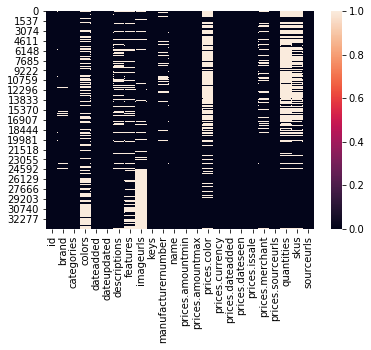

In [17]:
sns.heatmap(data_after_remove_df.isnull().astype('int'))

### After removing columns contain more than 50% of null values the new data set contains 24 columns.

In [18]:
data = data_after_remove_df
#Dealing with the NaN
print("Null values per column:")
data.isnull().sum()

Null values per column:


id                        0
brand                   984
categories                0
colors                13957
dateadded                 0
dateupdated               0
descriptions           5376
features               6620
imageurls             11492
keys                      0
manufacturernumber     2367
name                      0
prices.amountmin          0
prices.amountmax          0
prices.color          16380
prices.currency           0
prices.dateadded          0
prices.dateseen           0
prices.issale             0
prices.merchant        3875
prices.sourceurls         0
quantities            15311
skus                  11666
sourceurls                0
dtype: int64

In [19]:
data['colors'] = data['colors'].fillna('no color')


In [20]:
data['brand'] = data['brand'].fillna('no brand')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 24 columns):
id                    33801 non-null object
brand                 33801 non-null object
categories            33801 non-null object
colors                33801 non-null object
dateadded             33801 non-null object
dateupdated           33801 non-null object
descriptions          28425 non-null object
features              27181 non-null object
imageurls             22309 non-null object
keys                  33801 non-null object
manufacturernumber    31434 non-null object
name                  33801 non-null object
prices.amountmin      33801 non-null float64
prices.amountmax      33801 non-null float64
prices.color          17421 non-null object
prices.currency       33801 non-null object
prices.dateadded      33801 non-null object
prices.dateseen       33801 non-null object
prices.issale         33801 non-null bool
prices.merchant       29926 non-null object
prices.sour

### Creating new columns

In [22]:
 #Average price of shoes
data['prices.amountavg']= (data['prices.amountmin']+ data['prices.amountmax'])/2
print(data['prices.amountavg'].head(15))

0      62.99
1      62.99
2      62.99
3      62.99
4      62.99
5      62.99
6      56.69
7      30.00
8     100.00
9      25.99
10     10.00
11      8.00
12     70.00
13     89.00
14     55.99
Name: prices.amountavg, dtype: float64


In [23]:
data[['prices.amountmin','prices.amountmax','prices.amountavg']].head(10)

,prices.amountmin,prices.amountmax,prices.amountavg
0,62.99,62.99,62.99
1,62.99,62.99,62.99
2,62.99,62.99,62.99
3,62.99,62.99,62.99
4,62.99,62.99,62.99
5,62.99,62.99,62.99
6,56.69,56.69,56.69
7,30.00,30.00,30.00
8,100.00,100.00,100.00
9,25.99,25.99,25.99


In [24]:
data[['prices.amountmin','prices.amountavg','prices.amountmax']].describe()

,prices.amountmin,prices.amountavg,prices.amountmax
count,33801.000000,33801.000000,33801.000000
mean,87.655798,88.303038,88.950277
std,146.158393,147.504127,151.579682
min,0.010000,0.010000,0.010000
25%,33.990000,34.190000,34.390000
50%,52.990000,53.160000,53.560000
75%,89.000000,89.950000,89.950000
max,4270.000000,4270.000000,5200.000000


In [25]:
# Checking the currency 
data['prices.currency'].value_counts()

USD    32680
CAD     1008
EUR      101
AUD       11
GBP        1
Name: prices.currency, dtype: int64

### In this analysis we need customers who paid by US dollars. So we create a new dataframe only contains prices.currency =USD .

In [26]:
data_clean = data[data['prices.currency']=='USD']
data_clean['prices.currency'].value_counts()

USD    32680
Name: prices.currency, dtype: int64

In [27]:
data_clean.shape

(32680, 25)

In [28]:
data_clean.describe()

,prices.amountmin,prices.amountmax,prices.amountavg
count,32680.000000,32680.000000,32680.000000
mean,87.329726,88.240367,87.785046
std,146.493934,146.657391,146.498374
min,0.010000,0.010000,0.010000
25%,33.590000,33.990000,33.990000
50%,51.960000,51.990000,51.990000
75%,87.960000,89.000000,88.950000
max,4198.990000,4198.990000,4198.990000


The average shoe price is 88 dollars, the median 52 


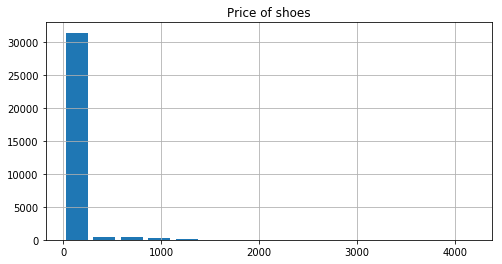

In [29]:
# How expensive are shoes
print('The average shoe price is {:,.0f} dollars, the median {:,.0f} '.format(
    data_clean['prices.amountmax'].mean(), data_clean['prices.amountmax'].median()))

data_clean['prices.amountmax'].hist(bins=15, rwidth=.8, figsize=(8,4))
plt.title('Price of shoes')
plt.show()

In [30]:
#creating a dataframe only contains datatypes object.
obj_df = data_clean.select_dtypes(include=['object']).copy()
obj_df.head().T

,0,1,2,3,4
id,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H,AVpe__eOilAPnD_xSt-H
brand,Novica,Novica,Novica,Novica,Novica
categories,"Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing","Access.,Clothing,Shoes,Women's Clothing"
colors,Purple,Purple,Purple,Purple,Purple
dateadded,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z,2017-02-03T22:06:24Z
dateupdated,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z,2017-03-28T11:53:51Z
descriptions,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017..."
features,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W..."
imageurls,NaN,NaN,NaN,NaN,NaN
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...


In [31]:
obj_df.shape

(32680, 21)

In [32]:
counts=obj_df['brand'].value_counts()
counts.head(15)

Journee Collection                1401
Ralph Lauren                       991
Skechers                           799
Propet                             796
Nike                               649
Novica                             574
Easy Spirit                        487
TOMS                               408
Drew                               387
Soft Style                         365
Rose Petals by Walking Cradles     359
Aerosoles                          356
Naturalizer                        354
In-Sattva                          332
David Tate                         330
Name: brand, dtype: int64

In [33]:
obj_df.groupby(['brand']).size().head(15)

brand
1 World Sarongs         23
143 GIRL                 5
143 Girl                 3
2 Lips Too              21
361                      1
79 SCII                  1
90 Degree by Reflex      1
A'rcopedico              2
A2 BY AEROSOLES          2
A2 By Aerosoles          6
A2 by Aerosoles        188
ADI                     21
AGL                     11
AMALFI BY RANGONI        4
ANNE KLEIN SPORT         7
dtype: int64

### Same brand names are grouped differently in our data frame because of upper case and lower case letters in it. We are going to convert it to all lowercase.

In [34]:
# converting all the column values of type object to lower case.
obj_df=obj_df.apply(lambda x: x.astype(str).str.lower())
obj_df.head().T

,0,1,2,3,4
id,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h
brand,novica,novica,novica,novica,novica
categories,"access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing"
colors,purple,purple,purple,purple,purple
dateadded,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z
dateupdated,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z
descriptions,"[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017..."
features,"[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w..."
imageurls,nan,nan,nan,nan,nan
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...


In [35]:
obj_df.groupby(['brand']).size().head(15)

brand
1 world sarongs         23
143 girl                 8
2 lips too              21
361                      1
79 scii                  1
90 degree by reflex      1
a'rcopedico              2
a.n.a                    9
a.x.n.y.                11
a2 by aerosoles        196
abound                   1
acacia                  16
academie gear           46
acorn                  113
adam tucker              9
dtype: int64

In [36]:
#checking the data types of new df.
obj_df.dtypes

id                    object
brand                 object
categories            object
colors                object
dateadded             object
dateupdated           object
descriptions          object
features              object
imageurls             object
keys                  object
manufacturernumber    object
name                  object
prices.color          object
prices.currency       object
prices.dateadded      object
prices.dateseen       object
prices.merchant       object
prices.sourceurls     object
quantities            object
skus                  object
sourceurls            object
dtype: object

In [37]:
counts=data['brand'].value_counts()
counts.head(10)

Journee Collection    1401
Ralph Lauren           991
no brand               984
Skechers               799
Propet                 796
Nike                   649
Novica                 574
Easy Spirit            487
TOMS                   408
Drew                   387
Name: brand, dtype: int64

In [38]:
# brands sold more than 100 pair of shoes
nbrand=counts[counts>=100]
nbrand.head()

Journee Collection    1401
Ralph Lauren           991
no brand               984
Skechers               799
Propet                 796
Name: brand, dtype: int64

In [39]:
nbrand.value_counts().sum()

84

In [40]:
data_clean.dtypes

id                     object
brand                  object
categories             object
colors                 object
dateadded              object
dateupdated            object
descriptions           object
features               object
imageurls              object
keys                   object
manufacturernumber     object
name                   object
prices.amountmin      float64
prices.amountmax      float64
prices.color           object
prices.currency        object
prices.dateadded       object
prices.dateseen        object
prices.issale            bool
prices.merchant        object
prices.sourceurls      object
quantities             object
skus                   object
sourceurls             object
prices.amountavg      float64
dtype: object

In [41]:
#creating dataframe contains all numerical values
num_df = data_clean.select_dtypes(include=['float64']).copy()
num_df.head()


,prices.amountmin,prices.amountmax,prices.amountavg
0,62.99,62.99,62.99
1,62.99,62.99,62.99
2,62.99,62.99,62.99
3,62.99,62.99,62.99
4,62.99,62.99,62.99


In [42]:
num_df.fillna(0).head()

,prices.amountmin,prices.amountmax,prices.amountavg
0,62.99,62.99,62.99
1,62.99,62.99,62.99
2,62.99,62.99,62.99
3,62.99,62.99,62.99
4,62.99,62.99,62.99


In [43]:
saledf= data_clean['prices.issale']
saledf.head()

0    False
1    False
2    False
3    False
4     True
Name: prices.issale, dtype: bool

In [44]:
saledf.value_counts()

False    26766
True      5914
Name: prices.issale, dtype: int64

In [45]:
#combining data frames
data_clean=pd.concat([obj_df,num_df,saledf], axis=1)

In [46]:
data_clean.head().T

,0,1,2,3,4
id,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h
brand,novica,novica,novica,novica,novica
categories,"access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing"
colors,purple,purple,purple,purple,purple
dateadded,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z
dateupdated,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z
descriptions,"[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017..."
features,"[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w..."
imageurls,nan,nan,nan,nan,nan
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...


<Figure size 800x600 with 0 Axes>

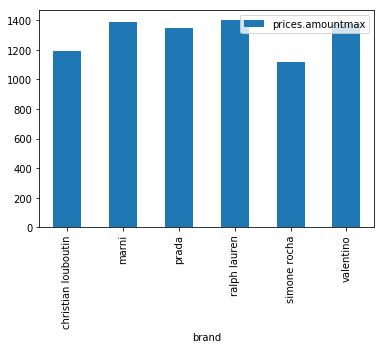

In [47]:
#Price by brand
most_expensive = data_clean.sort_values(by='prices.amountmax', ascending=False).head(120).tail(100)
plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
#most_expensive.groupby('brand')['prices.amountmax'].plot(kind='bar')
most_expensive[['brand','prices.amountmax']].groupby('brand').agg('max').plot(kind='bar')

In [48]:
#def filter_max(x):
   # return x['prices.amountmax'].max()>100
expensive=data_clean.sort_values(by='prices.amountmax',ascending=False)
highbrand=expensive[['brand','prices.amountmax']].groupby('brand').agg(max)>100 #.filter(filter_max)
highbrand.head(20)

,prices.amountmax
brand,
1 world sarongs,False
143 girl,False
2 lips too,False
361,False
79 scii,False
90 degree by reflex,False
a'rcopedico,False
a.n.a,False
a.x.n.y.,False


In [49]:
#creating a new column with boolean values.Shoes priced over $100 is expensive,under 100 is affordable.
data_clean['price.stat']=(data_clean['prices.amountmax']>100)
data_clean.head().T

,0,1,2,3,4
id,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h
brand,novica,novica,novica,novica,novica
categories,"access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing"
colors,purple,purple,purple,purple,purple
dateadded,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z
dateupdated,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z
descriptions,"[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017..."
features,"[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w..."
imageurls,nan,nan,nan,nan,nan
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...


In [50]:
# New column brand count
data_clean['brand.count'] = data_clean['brand'].map(data_clean['brand'].value_counts())
data_clean[['brand','brand.count']]

,brand,brand.count
0,novica,574
1,novica,574
2,novica,574
3,novica,574
4,novica,574
5,novica,574
6,novica,574
7,pedi couture,1
8,anne klein sport,16
9,anne klein sport,16


In [51]:
affordable=data_clean.sort_values(by='prices.amountmax')
affordable=affordable[['brand','prices.amountmax']].groupby('brand').agg(min)<100 #.filter(filter_max)
affordable.head(20)

,prices.amountmax
brand,
1 world sarongs,True
143 girl,True
2 lips too,True
361,True
79 scii,True
90 degree by reflex,True
a'rcopedico,True
a.n.a,True
a.x.n.y.,True


In [52]:
brand_price=data_clean.groupby('brand').aggregate(['min', np.median, max])
brand_price.head().T

brand                   1 world sarongs 143 girl 2 lips too    361 79 scii
prices.amountmin min              12.77     0.99       7.99     80   11.87
                 median           18.49   16.495         40     80   11.87
                 max              32.74       40         95     80   11.87
prices.amountmax min              12.77     0.99       7.99     80   14.99
                 median           18.49   16.495         40     80   14.99
                 max              32.74       40         95     80   14.99
prices.amountavg min              12.77     0.99       7.99     80   13.43
                 median           18.49   16.495         40     80   13.43
                 max              32.74       40         95     80   13.43
prices.issale    min              False    False      False  False   False
                 median               0        1          1      0       0
                 max               True     True       True  False   False
price.stat       min              False    False      False  False   False
                 median               0        0          0      0       0
                 max              False    False      False  False   False
brand.count      min                 23        8         21      1       1
                 median              23        8         21      1       1
                 max                 23        8         21      1       1

In [53]:
# creating price band to group the prices in data. price>=30 = 0,price>30 & <=100 =1, price>100 =2
data_clean['price_band']=0
data_clean.loc[data_clean['prices.amountmax']<=30,'price_band']=0
data_clean.loc[(data_clean['prices.amountmax']>30)&(data_clean['prices.amountmax']<=100),'price_band']=1
data_clean.loc[data_clean['prices.amountmax']>100,'price_band']=2
data_clean.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__eoilapnd_xst-h,avpe__jxilapnd_xst3f,avpe_0mrilapnd_xsqi7,avpe_0mrilapnd_xsqi7
brand,novica,novica,novica,novica,novica,novica,novica,pedi couture,anne klein sport,anne klein sport
categories,"access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","access.,clothing,shoes,women's clothing","clothing,shoes,women's shoes,all women's shoes","clothing,shoes,women's shoes,all women's shoes","clothing,shoes,women's shoes,all women's shoes"
colors,purple,purple,purple,purple,purple,purple,purple,no color,no color,no color
dateadded,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2017-02-03t22:06:24z,2016-11-10t09:13:23z,2016-08-02t08:29:11z,2016-08-02t08:29:11z
dateupdated,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2017-03-28t11:53:51z,2016-11-10t09:13:23z,2016-08-02t08:29:11z,2016-08-02t08:29:11z
descriptions,"[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2017-03-26t05:04:46.539z"",""2017...","[{""dateseen"":[""2016-11-10t09:13:23z""],""sourceu...","[{""dateseen"":[""2016-08-02t08:29:11z""],""sourceu...","[{""dateseen"":[""2016-08-02t08:29:11z""],""sourceu..."
features,"[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""pattern"",""value"":[""solid""]},{""key"":""w...","[{""key"":""assembled product dimensions (l x w x...","[{""key"":""heel height"",""value"":[""high (3 in. an...","[{""key"":""heel height"",""value"":[""high (3 in. an..."
imageurls,nan,nan,nan,nan,nan,nan,nan,https://i5.walmartimages.com/asr/20e1735e-44ea...,https://i5.walmartimages.com/asr/a46ef448-e801...,https://i5.walmartimages.com/asr/a46ef448-e801...
keys,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,handcraftedalpacablendpurplecharismasweaterper...,"83,961,324,637,083,900,000,000",annekleinsport/250101782qt,annekleinsport/250101782qt


In [54]:
data_clean['price_band'].value_counts()

1    19721
2     6544
0     6415
Name: price_band, dtype: int64

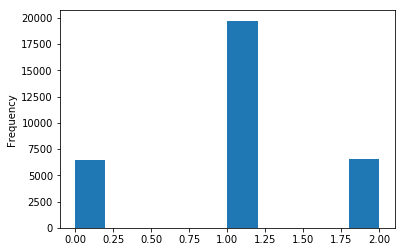

In [56]:
data_clean['price_band'].plot(kind='hist')

C:\Users\jisha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


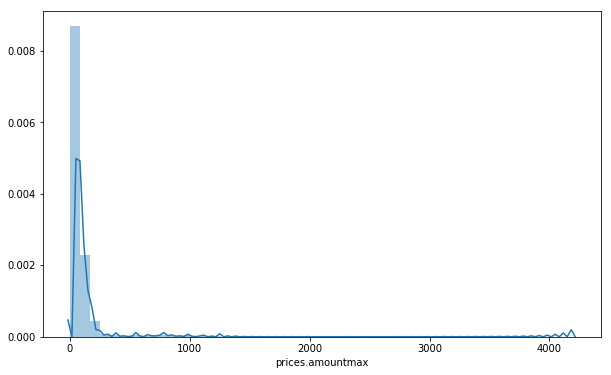

In [65]:
# univariate analysis on price variable, Prices.amountmax
plt.figure(figsize=(10,6))
sns.distplot(data_clean['prices.amountmax'])
plt.show()

In [66]:
# Label encoding- first step checking datatypes 
data_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32680 entries, 0 to 33800
Data columns (total 28 columns):
id                    32680 non-null object
brand                 32680 non-null object
categories            32680 non-null object
colors                32680 non-null object
dateadded             32680 non-null object
dateupdated           32680 non-null object
descriptions          32680 non-null object
features              32680 non-null object
imageurls             32680 non-null object
keys                  32680 non-null object
manufacturernumber    32680 non-null object
name                  32680 non-null object
prices.color          32680 non-null object
prices.currency       32680 non-null object
prices.dateadded      32680 non-null object
prices.dateseen       32680 non-null object
prices.merchant       32680 non-null object
prices.sourceurls     32680 non-null object
quantities            32680 non-null object
skus                  32680 non-null object
sourceurls 

In [67]:
# Converting the boolean values to 0,1 using .astype()
data_clean[['prices.issale','price.stat']] = data_clean[['prices.issale','price.stat']].astype('int')
data_clean.dtypes

id                     object
brand                  object
categories             object
colors                 object
dateadded              object
dateupdated            object
descriptions           object
features               object
imageurls              object
keys                   object
manufacturernumber     object
name                   object
prices.color           object
prices.currency        object
prices.dateadded       object
prices.dateseen        object
prices.merchant        object
prices.sourceurls      object
quantities             object
skus                   object
sourceurls             object
prices.amountmin      float64
prices.amountmax      float64
prices.amountavg      float64
prices.issale           int32
price.stat              int32
brand.count             int64
price_band              int64
dtype: object

In [68]:
data_clean[['prices.issale','price.stat']].head()

,prices.issale,price.stat
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [69]:
data_clean['price.stat'].value_counts()

0    26136
1     6544
Name: price.stat, dtype: int64

In [70]:
#Encode the brand values which are strings to integers.
from sklearn.preprocessing import LabelEncoder

lb_brand = LabelEncoder()
data_clean['brand_code'] = lb_brand.fit_transform(data_clean['brand'])
data_clean[['brand', 'brand_code']].head(10)


,brand,brand_code
0,novica,831
1,novica,831
2,novica,831
3,novica,831
4,novica,831
5,novica,831
6,novica,831
7,pedi couture,880
8,anne klein sport,56
9,anne klein sport,56


In [71]:
data_clean['brand_code'].dtypes

dtype('int64')

In [72]:
lb_brand = LabelEncoder()
data_clean['colors_code'] = lb_brand.fit_transform(data_clean['colors'])
data_clean[['colors', 'colors_code']].head(10)

,colors,colors_code
0,purple,1495
1,purple,1495
2,purple,1495
3,purple,1495
4,purple,1495
5,purple,1495
6,purple,1495
7,no color,1393
8,no color,1393
9,no color,1393


In [73]:
lb_brand = LabelEncoder()
data_clean['merchant_code'] = lb_brand.fit_transform(data_clean['prices.merchant'])
data_clean[['prices.merchant', 'merchant_code']].head(10)

,prices.merchant,merchant_code
0,overstock.com,153
1,overstock.com,153
2,overstock.com,153
3,overstock.com,153
4,overstock.com,153
5,overstock.com,153
6,overstock.com,153
7,big deal hunter - walmart.com,41
8,apparelsave - walmart.com,23
9,apparelsave - walmart.com,23


In [74]:
data_clean['id'].nunique()

9056

In [75]:
data_clean['id'].unique()

array(['avpe__eoilapnd_xst-h', 'avpe__jxilapnd_xst3f',
       'avpe_0mrilapnd_xsqi7', ..., 'avsuyecau2_qcyx9pb4g',
       'avticmzvnnc1jgdc5uym', 'avtiddq-nnc1jgdc5u4q'], dtype=object)

In [76]:
dupe_id= data_clean.groupby('brand')[['id']].count()
dupe_id.sort_values('brand').reset_index()
dupe_id.columns=['no_of_dupes']
dupe_id.head(10)

,no_of_dupes
brand,
1 world sarongs,23
143 girl,8
2 lips too,21
361,1
79 scii,1
90 degree by reflex,1
a'rcopedico,2
a.n.a,9
a.x.n.y.,11


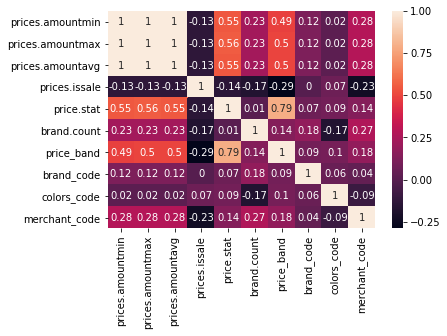

In [77]:
correlation_matrix = data_clean.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

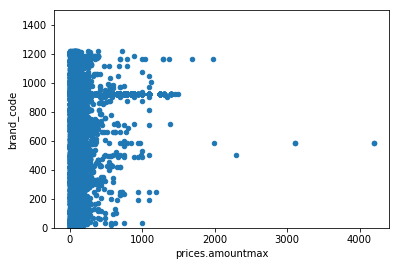

In [78]:
#bivariate analysis price/brand
var = 'brand_code'
data = pd.concat([data_clean['prices.amountmax'], data_clean[var]], axis=1)
data.plot.scatter(x='prices.amountmax', y=var, ylim=(0,1500));

### Outliers

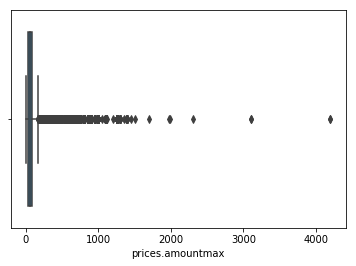

In [79]:
sns.boxplot(data_clean['prices.amountmax'])

In [80]:
# Detecting outliers using Z score
from scipy import stats
z = np.abs(stats.zscore(data_clean['prices.amountmax']))
print(z)

[0.17217512 0.17217512 0.17217512 ... 0.35628048 0.42685421 0.27445588]


In [81]:
threshold = 3
print(np.where(z > 3))

(array([  135,   260,   317,   334,   335,   336,   337,   338,   339,
         340,   341,   342,   343,   344,   345,   346,   347,   388,
         881,   933,   989,  1190,  1233,  1244,  1368,  1369,  1370,
        1371,  1372,  1373,  1374,  1375,  1376,  1377,  1378,  1379,
        1380,  1381,  1408,  1409,  1410,  1411,  1412,  1413,  1414,
        1415,  1416,  1417,  1418,  1419,  1420,  1421,  1438,  1496,
        1650,  1651,  1652,  1653,  1654,  1655,  1656,  1657,  1658,
        1659,  1660,  1661,  1662,  1663,  1664,  1753,  1754,  1755,
        1756,  1757,  1758,  1759,  1760,  1761,  1762,  1763,  1764,
        1765,  1766,  1767,  1768,  1769,  1770,  1771,  1772,  1773,
        1774,  1775,  1776,  1777,  1778,  1779,  1780,  1781,  1782,
        1783,  1784,  1785,  1786,  1787,  1788,  1789,  1790,  1791,
        1792,  1843,  2104,  2108,  2423,  2509,  2766,  2826,  3031,
        3091,  3092,  3093,  3094,  3095,  3096,  3097,  3098,  3099,
        3100,  3101

In [82]:
print(z[135])
print(z[6888])

3.455450713934706
0.04602884399049441


In [83]:
#IQR score
Q1 = data_clean['prices.amountmax'].quantile(0.25)
Q3 = data_clean['prices.amountmax'].quantile(0.75)
IQR = Q3 - Q1
print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)

Q1= 33.99
Q3= 89.0
IQR= 55.01


In [221]:
arr = data_clean['prices.amountmax']

outliers = np.array(arr)

mean = np.mean(outliers, axis=0)
sd = np.std(outliers, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
#print(final_list)

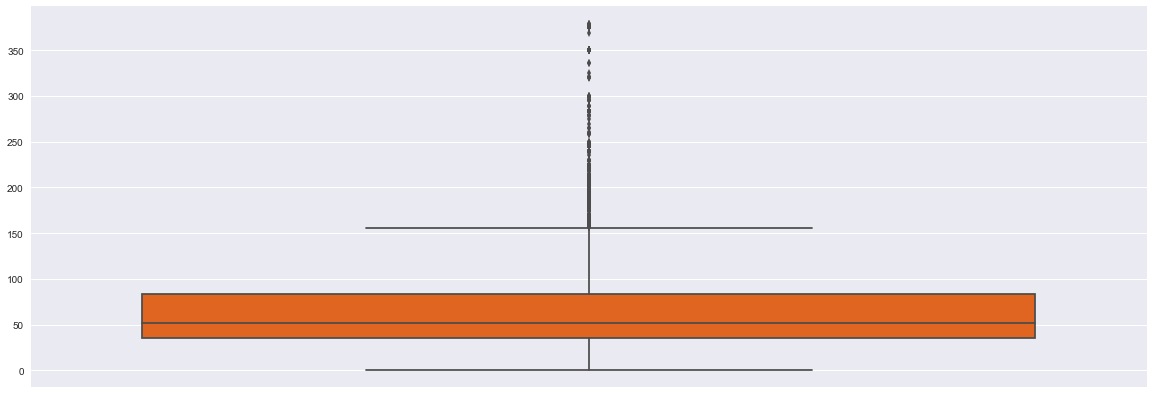

In [222]:
sns.boxplot(final_list,orient='v',palette='hot')

In [223]:
outliers = data_clean[data_clean['prices.amountmax'] > data_clean['prices.amountmax'].mean() + 2 * data_clean['prices.amountmax'].std()]

In [224]:
#print(outliers)

In [225]:
outliers.describe()

,prices.amountmin,prices.amountmax,prices.amountavg,prices.issale,price.stat,brand.count,price_band,brand_code,colors_code,merchant_code
count,816.000000,816.000000,816.000000,816.000000,816.0,816.000000,816.0,816.000000,816.000000,816.000000
mean,811.271777,811.774228,811.523002,0.009804,1.0,990.719363,2.0,921.352941,886.686275,259.605392
std,246.735014,245.684593,246.158097,0.098589,0.0,35.085500,0.0,30.787344,513.259073,6.608689
min,189.990000,395.000000,294.990000,0.000000,1.0,210.000000,2.0,119.000000,126.000000,141.000000
25%,650.000000,650.000000,650.000000,0.000000,1.0,992.000000,2.0,923.000000,329.000000,260.000000
50%,795.000000,795.000000,795.000000,0.000000,1.0,992.000000,2.0,923.000000,878.000000,260.000000
75%,995.000000,995.000000,995.000000,0.000000,1.0,992.000000,2.0,923.000000,1441.000000,260.000000
max,1500.000000,1500.000000,1500.000000,1.000000,1.0,1401.000000,2.0,923.000000,1705.000000,262.000000


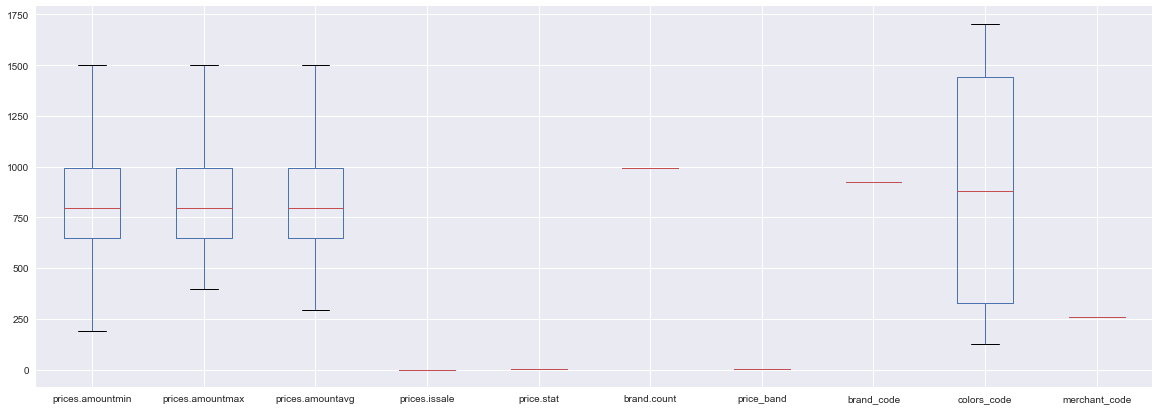

In [226]:
outliers.boxplot()

In [227]:
# data_clean=data_clean.drop[data_clean.loc[(data_clean['prices.amountmax']<10)]
data_keep = data_clean[(data_clean['prices.amountmax'] < 10) | (data_clean['prices.amountmax'] >1000)]


In [228]:
data_keep.shape

(506, 31)

In [229]:
data_clean.shape

(24685, 31)

In [230]:
data_clean = data_clean.drop(data_clean[(data_clean['prices.amountmax'] < 10) & (data_clean['prices.amountmax'] > 1000)].index)

In [231]:
data_clean.shape

(24685, 31)

In [232]:
# Filter the brands sold more than 50 pairs of shoes and assign back to the original data frame.
data_clean = data_clean[data_clean["brand.count"]>50]

In [233]:
data_clean.shape

(24685, 31)

In [234]:
data_clean.columns

Index(['id', 'brand', 'categories', 'colors', 'dateadded', 'dateupdated',
       'descriptions', 'features', 'imageurls', 'keys', 'manufacturernumber',
       'name', 'prices.color', 'prices.currency', 'prices.dateadded',
       'prices.dateseen', 'prices.merchant', 'prices.sourceurls', 'quantities',
       'skus', 'sourceurls', 'prices.amountmin', 'prices.amountmax',
       'prices.amountavg', 'prices.issale', 'price.stat', 'brand.count',
       'price_band', 'brand_code', 'colors_code', 'merchant_code'],
      dtype='object')

#### Creating new dataframe for machine learning model

In [235]:
shoedf =data_clean[['brand','prices.amountmax','prices.issale','price.stat','brand.count','price_band','brand_code','colors_code','merchant_code']]

In [236]:
shoedf.head().T

,0,1,2,3,4
brand,novica,novica,novica,novica,novica
prices.amountmax,62.99,62.99,62.99,62.99,62.99
prices.issale,0,0,0,0,1
price.stat,0,0,0,0,0
brand.count,574,574,574,574,574
price_band,1,1,1,1,1
brand_code,831,831,831,831,831
colors_code,1495,1495,1495,1495,1495
merchant_code,153,153,153,153,153


In [237]:
shoedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24685 entries, 0 to 33798
Data columns (total 9 columns):
brand               24685 non-null object
prices.amountmax    24685 non-null float64
prices.issale       24685 non-null int32
price.stat          24685 non-null int32
brand.count         24685 non-null int64
price_band          24685 non-null int64
brand_code          24685 non-null int64
colors_code         24685 non-null int64
merchant_code       24685 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 1.7+ MB


In [238]:
shoedf['brand_code'].value_counts().head(10)
shoedf['brand_code'].value_counts().tail(5)

945    54
319    54
628    52
223    52
166    51
Name: brand_code, dtype: int64

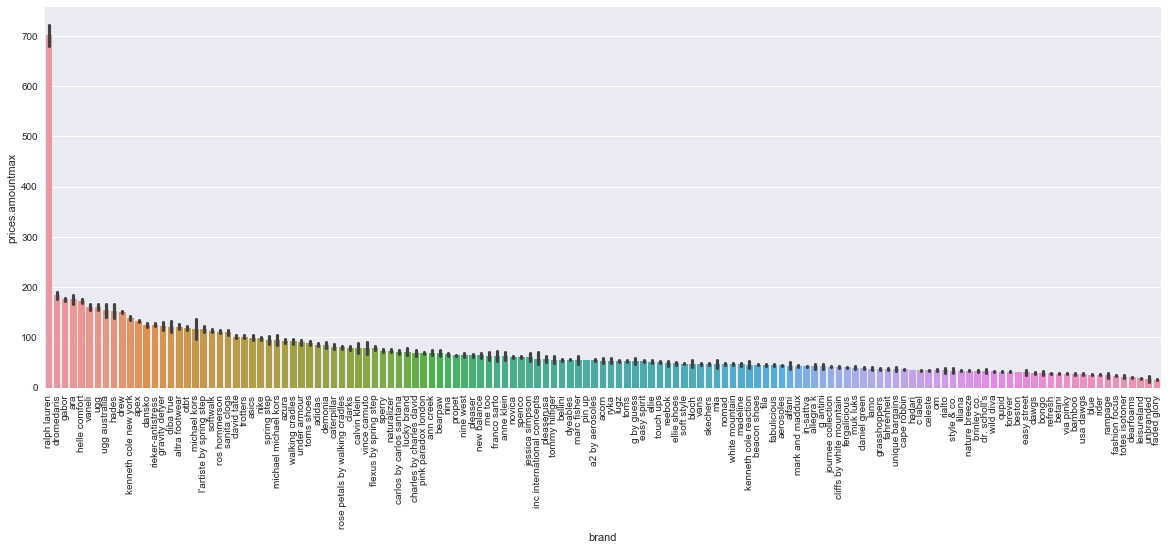

In [239]:
#Plot of average price by brand.
df = pd.DataFrame({col:vals['prices.amountmax'] for col,vals in shoedf.groupby('brand')})
mean = df.mean()
mean.sort_values(ascending=False, inplace=True)

fig1, ax1 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='brand',y='prices.amountmax', data=shoedf, order=mean.index, ax = ax1)
plt.xticks(rotation = 90)
plt.show()

Except' Ralph Lauren' all brands in the final dataset got average price under $200.

In [240]:
print(shoedf['brand'].unique())

['novica' 'marc fisher' 'inc international concepts' 'lugz' 'skechers'
 'vince camuto' 'bloch' 'michael kors' 'nike' 'wild diva' 'faded glory'
 'jessica simpson' 'style & co.' 'asics' 'nature breeze' 'dyeables'
 'alfani' 'muk luks' 'franco sarto' 'touch ups' 'me too' 'pleaserusa'
 'easy spirit' 'g antini' 'reebok' 'white mountain' 'journee collection'
 'g by guess' 'ellie shoes' 'ellie' 'propet' 'michael michael kors'
 'brinley co.' 'calvin klein' 'grasshoppers' 'hades' 'nina' 'new balance'
 'bearpaw' 'toms' 'nine west' 'ralph lauren' 'mia' 'aerosoles' 'vans'
 'walking cradles' 'qupid' 'rieker-antistress' 'dansko' 'rampage'
 'softwalk' 'bongo' 'ros hommerson' 'charles by charles david'
 'ugg australia' 'easy street' "dr. scholl's" 'acorn' 'c label' 'bellini'
 'vaneli' 'ugg' 'lamo' 'under armour' 'rose petals by walking cradles'
 'a2 by aerosoles' 'unique bargains' 'trotters' 'kenneth cole reaction'
 'allegra k' 'totes isotoner' 'fabulicious' 'ann creek' 'bamboo' 'pleaser'
 'rialto' 'da

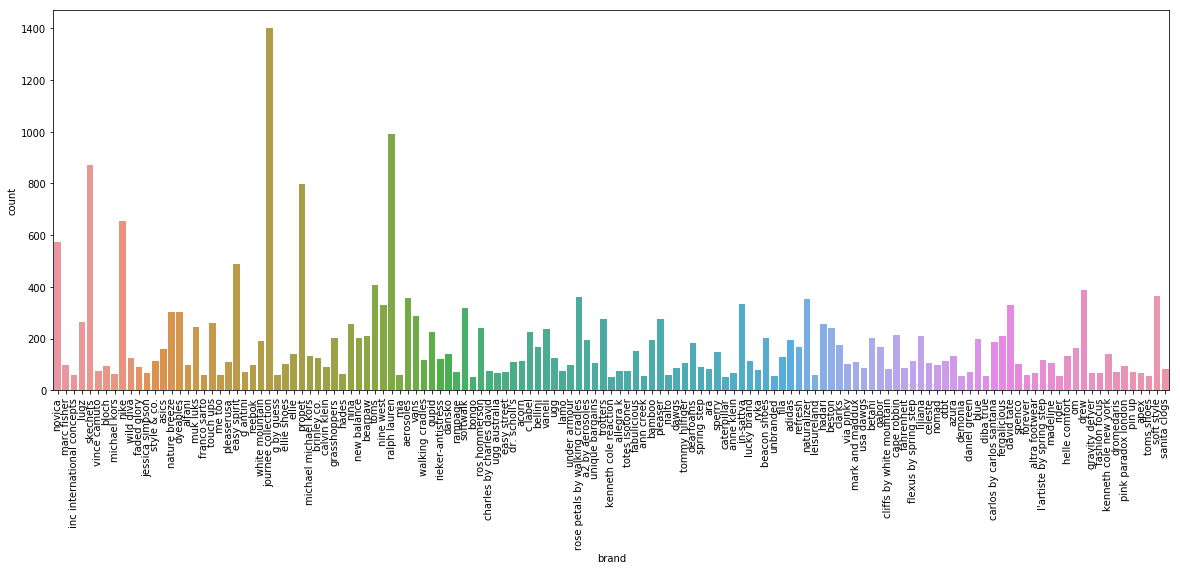

In [138]:
plt.rcParams['figure.figsize'] = [20, 7]
sns.countplot(shoedf['brand'],label="Count")
plt.xticks(rotation = 90)
plt.show()

Journee collection is the top selling brand got a low average price.Ralph lauren is the second top selling brand got the highest average price.

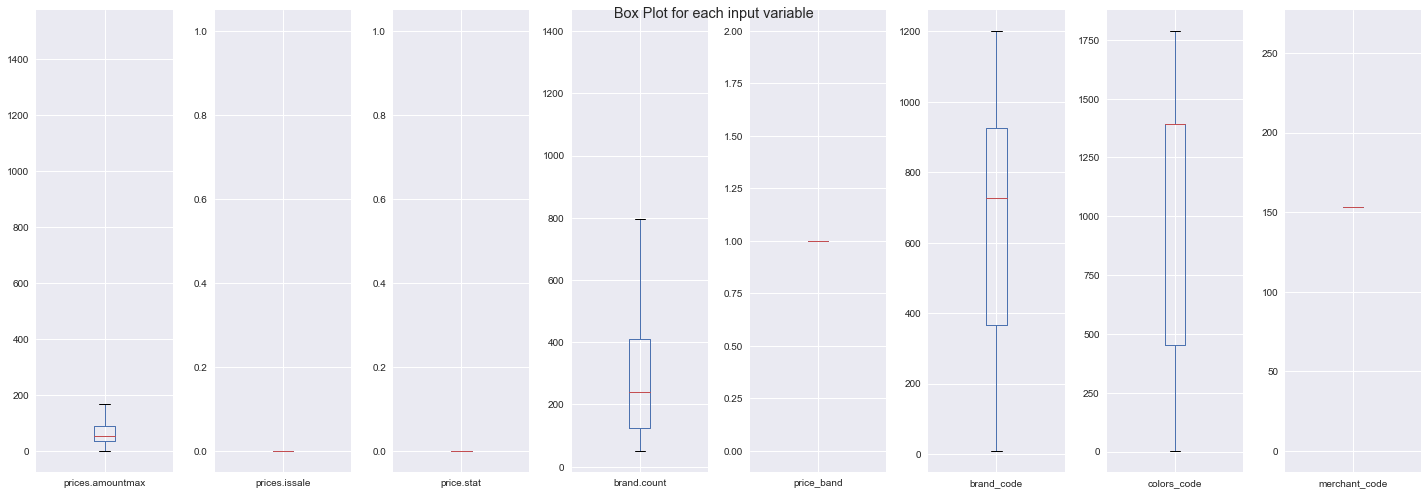

In [248]:
#Boxplot of all numerical features
shoedf.drop('brand', axis=1).plot(kind='box',subplots=True,sharex=False, sharey=False,title='Box Plot for each input variable')
plt.savefig('shoe_box')
plt.tight_layout()
plt.show()

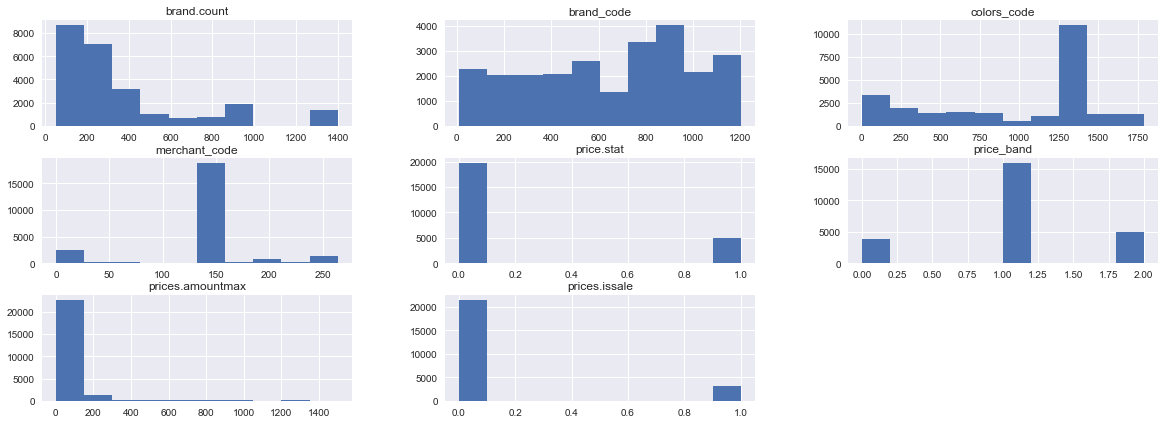

In [249]:
# histograms
shoedf.hist()
plt.show()

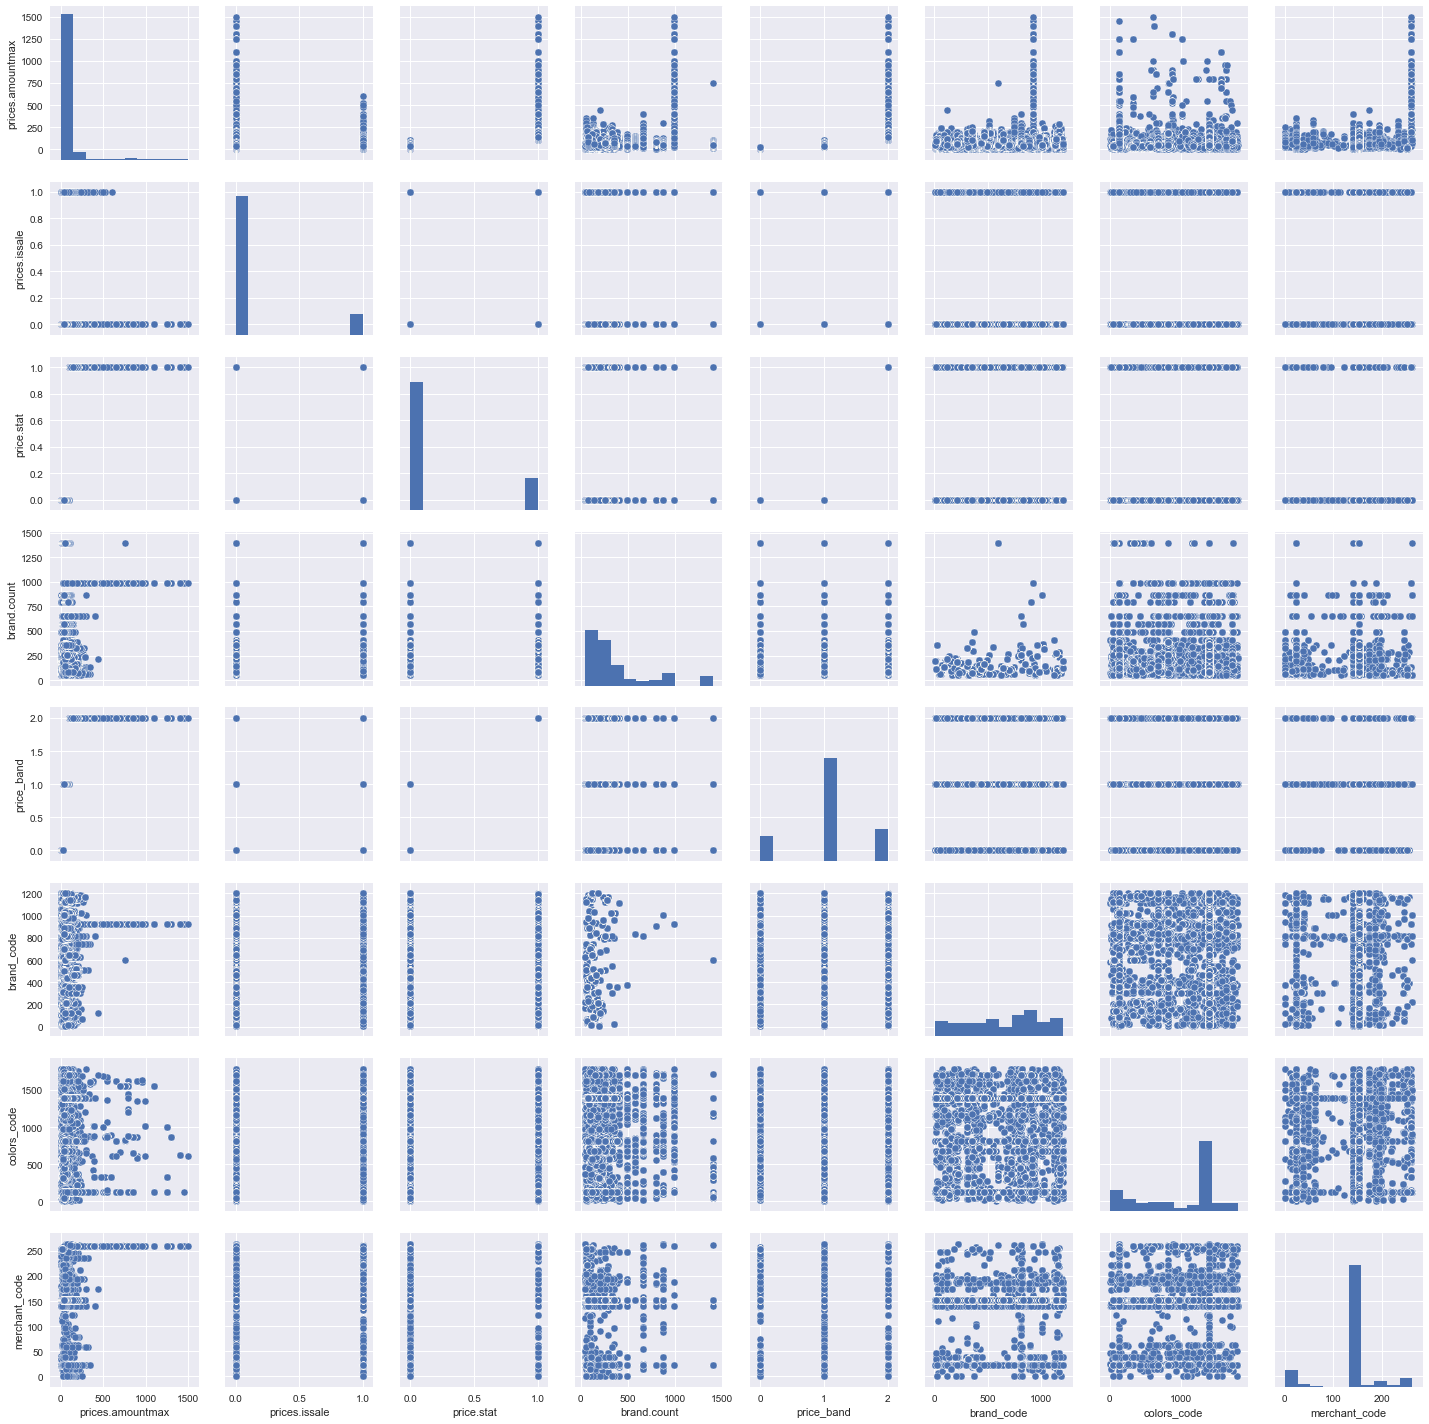

In [250]:
sns.set()
sns.pairplot(shoedf, size = 2.5)
plt.show();

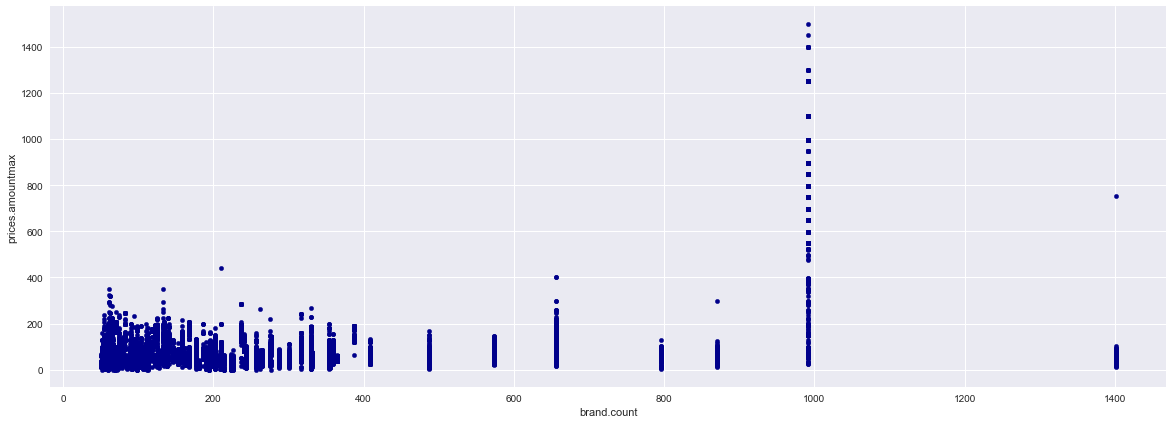

In [251]:
shoedf.plot.scatter(x='brand.count',y='prices.amountmax',c='DarkBlue')

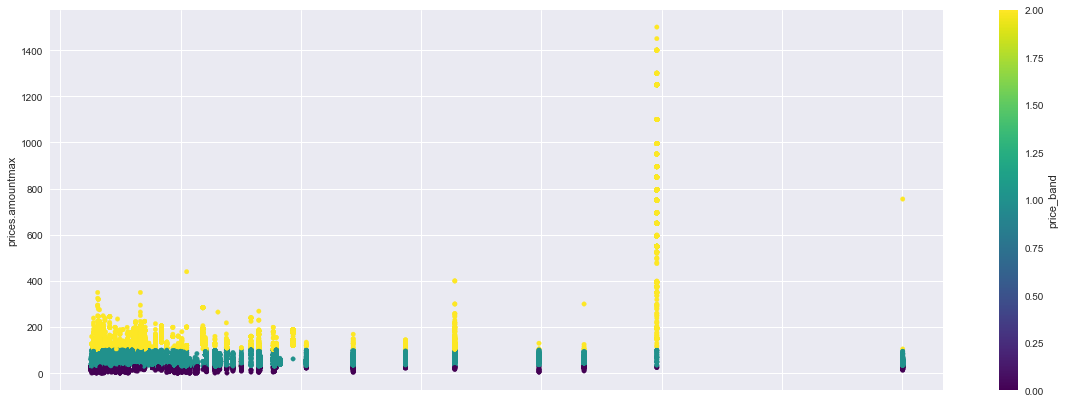

In [252]:
shoedf.plot.scatter(x='brand.count',y='prices.amountmax',c='price_band', colormap='viridis')

Shoes that sold more is in the price range over $30 and up. Women really do prefer to spend reasonable or high amount of money for their shoes.Cheaper price is not an attractive factor here. 

In [254]:
# 0= price<=$30,1= price>30 & <=100,2= price>100
shoedf['price_band'].value_counts()

1    15943
2     4914
0     3828
Name: price_band, dtype: int64

#### Preprocessing 

In [255]:
# New df to split data contains only numerical values.
newdf=shoedf[['brand','prices.amountmax','prices.issale','price.stat','brand.count','price_band','colors_code','merchant_code','brand_code']]

In [256]:
#X = newdf.iloc[:,0:8].values  
#y = newdf.iloc[:,8].values
X = np.array(newdf.iloc[:,1:8])
y = np.array(newdf['brand_code'])
print(X.shape)
print(y.shape)


(24685, 7)
(24685,)


In [257]:
#Creating training and test splits(The code splits the dataset into 70% train data and 30% test data)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  

In [258]:
#Feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

#### KNN Model

In [259]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [260]:
#predictions on test data
y_pred = classifier.predict(X_test)  

In [261]:
y_pred

array([522,  16, 448, ..., 818, 373, 808], dtype=int64)

In [262]:
print('Predicted Class' , newdf.loc[newdf['brand_code'] == 433, 'brand'].values[0])

Predicted Class fila


In [263]:
# Check accuracy
accuracy = classifier.score(X_train,y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.8720990798078593


In [264]:
#Evaluating the algorithm- The confusion_matrix and classification_reportmethods from sklearn.metrics
#calculate confusion matrix, precision, recall and f1 score
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 


[[51  0  0 ...  0  2  0]
 [ 0 15  1 ...  0  0  0]
 [ 1  0 55 ...  0  1  0]
 ...
 [ 0  2  0 ... 25  0  0]
 [ 1  0  0 ...  0 33  0]
 [ 0  2  0 ...  0  0 21]]
             precision    recall  f1-score   support

          9       0.91      0.84      0.87        61
         13       0.41      0.43      0.42        35
         16       0.81      0.89      0.85        62
         24       0.92      0.87      0.89       116
         34       0.13      0.20      0.16        35
         37       0.33      0.44      0.38        18
         41       0.92      0.80      0.86        15
         51       0.65      0.65      0.65        20
         54       0.32      0.50      0.39        22
         65       0.80      1.00      0.89        12
         67       0.62      0.87      0.72        15
         78       0.50      0.57      0.53        47
         90       0.66      0.87      0.75        38
        101       0.69      0.86      0.77        51
        118       0.85      0.88      0.87      

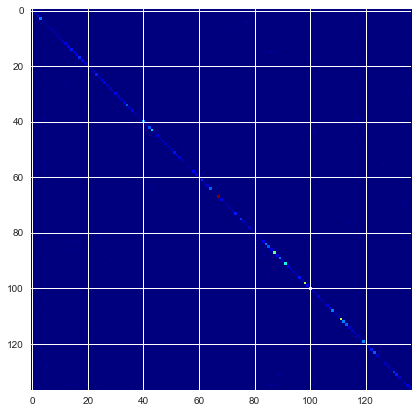

In [265]:
#computing confusion matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

#### Comparing Error Rate with the K Value

One way to find the best value of K is to plot the graph of K value and
the corresponding error rate for the dataset.In this section, we will plot the mean error for
the predicted values of test set for all the K values between 1 and 40.To do so, let's 
first calculate the mean of error for all the predicted values where K ranges from 1 and 40.

In [266]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

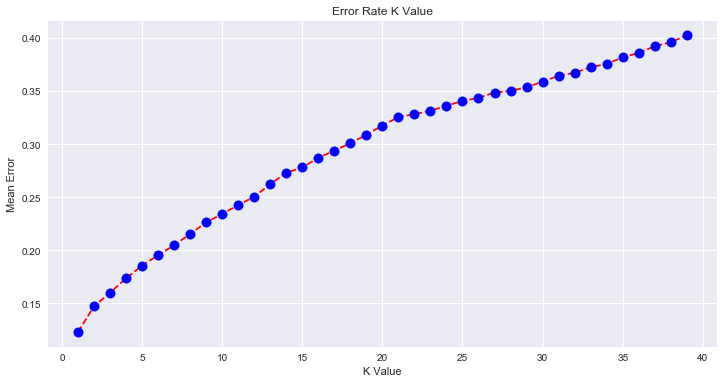

In [267]:
#plot the error values against K values
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [268]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [269]:
pred = knn.predict(X_test)
pred

array([522,  16, 448, ..., 818, 373, 808], dtype=int64)

In [270]:
accuracy = knn.score(X_train,y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.9097169975114301


#### Evaluate 6 different algorithams
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

In [271]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [272]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [273]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.231090 (0.008257)


C:\Users\jisha\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.832976 (0.003417)
KNN: 0.807860 (0.005248)
CART: 0.976677 (0.003296)
NB: 0.925632 (0.006348)
SVM: 0.421321 (0.007997)


###### It looks like CART has the largest estimated accuracy score. Linear regression has the worst.

Creating a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

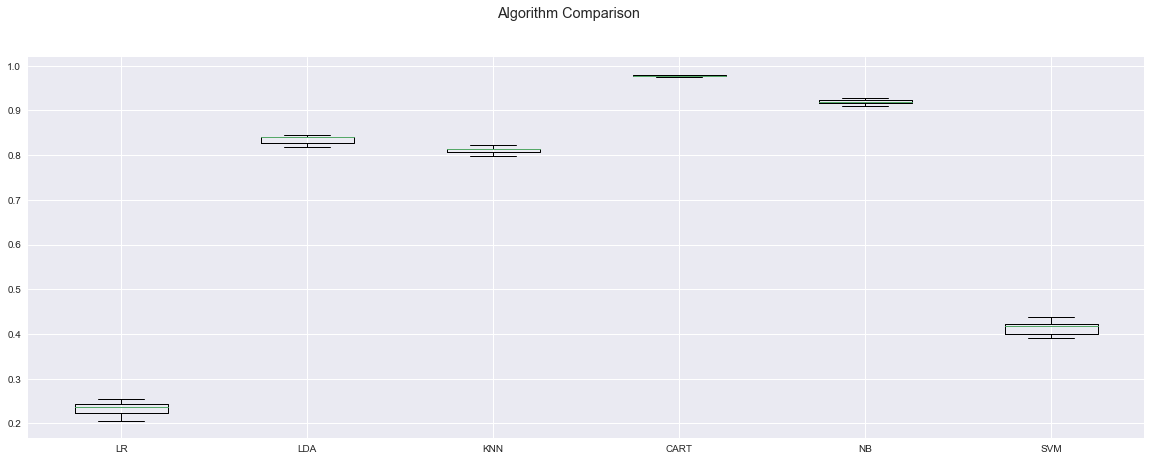

In [202]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Checking the accuracy of the model on validation set.

In [203]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.9777207669457196
[[63  0  4 ...  0  0  0]
 [ 0 33  0 ...  0  0  0]
 [ 2  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 36]]
             precision    recall  f1-score   support

          9       0.97      0.94      0.95        67
         13       0.89      0.89      0.89        37
         16       0.93      0.96      0.95        57
         24       1.00      1.00      1.00       104
         34       0.23      0.29      0.25        24
         37       0.94      1.00      0.97        16
         41       1.00      1.00      1.00        18
         51       1.00      1.00      1.00        18
         54       1.00      0.96      0.98        27
         65       0.96      1.00      0.98        22
         67       1.00      1.00      1.00        26
         78       1.00      1.00      1.00        55
         90       0.93      1.00      0.96        40
        101       1.00      1.00      1.00        66
        118       0.93      0

In [219]:
print( newdf.loc[newdf['brand_code'] == 34, 'brand'].values[0])

alfani


In [218]:
newdf[['brand','brand_code']]

,brand,brand_code
0,novica,831
1,novica,831
2,novica,831
3,novica,831
4,novica,831
5,novica,831
6,novica,831
13,marc fisher,711
14,marc fisher,711
15,marc fisher,711
